In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [146]:
df = pd.read_csv(glob.glob("*.bed")[0],sep="\t",index_col=0)

In [5]:
df.head()

,Chr,Start,End,Strand,Length,SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam,SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam,SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920582_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,...,SRR2920558_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920486_megakaryocyte_erythroid_progenitor_cell_MEP.rmdup.bam,SRR2920571_acute_myeloid_leukemia__preminusleukemic_hematopoietic_stem_cell_pHSC.rmdup.bam,SRR2920561_acute_myeloid_leukemia__preminusleukemic_hematopoietic_stem_cell_pHSC.rmdup.bam,SRR2920529_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920469_common_myeloid_progenitor_cell_CMP.rmdup.bam,SRR2920567_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920569_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920479_multipotent_progenitor_cell_MPP.rmdup.bam,SRR2920523_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
region_1,chr1,9921,10704,+,784,146,131,339,56,266,...,173,114,181,133,106,162,226,322,123,47
region_2,chr1,11071,11539,+,469,31,24,22,16,110,...,25,10,36,94,31,10,15,44,17,25
region_3,chr1,13303,13664,+,362,11,13,59,1,19,...,9,16,25,18,4,16,7,12,22,2
region_4,chr1,15477,15804,+,328,16,23,26,4,20,...,32,22,31,15,6,12,20,45,21,2
region_5,chr1,16126,16384,+,259,7,4,9,2,4,...,6,7,12,16,0,10,5,14,12,2


In [7]:
df.columns.tolist()

['Chr',
 'Start',
 'End',
 'Strand',
 'Length',
 'SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam',
 'SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920582_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam',
 'SRR2920518_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920510_multipotent_progenitor_cell_MPP.rmdup.bam',
 'SRR2920519_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920495_CD56plus_natural_killer_cell_NKcell.rmdup.bam',
 'SRR2920504_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920472_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920476_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920488_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920492_CD19plusCD20plus_B_cell_Bcell.rmdup.bam',
 'SRR2920574_acute_myeloid_leukemia__preminusleukemic_hematopoietic_stem_cell_pHSC.rmdup.bam',
 'SRR2920554_acute_myeloid_leukemia_

In [147]:
select_cols = []
for c in df.columns:
    if not "_" in c:
        continue
    if "acute" in c:
        continue
    if "CD34" in c:
        continue
    select_cols.append(c)

In [148]:
df = df[select_cols]

In [149]:
df.columns.tolist()

['SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam',
 'SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920518_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920510_multipotent_progenitor_cell_MPP.rmdup.bam',
 'SRR2920519_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920495_CD56plus_natural_killer_cell_NKcell.rmdup.bam',
 'SRR2920504_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920472_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920476_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920488_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920492_CD19plusCD20plus_B_cell_Bcell.rmdup.bam',
 'SRR2920477_hematopoietic_stem_cell_HSC.rmdup.bam',
 'SRR2920500_common_myeloid_progenitor_cell_CMP.rmdup.bam',
 'SRR2920497_CD8plus_T_cell_CD8Tcell.rmdup.bam',
 'SRR2920483_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920471_gr

In [150]:
df = ( df/df.sum())*1000000 ## RPM

In [151]:
df = df.T

In [152]:
df.head()

Geneid,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,...,region_361097,region_361098,region_361099,region_361100,region_361101,region_361102,region_361103,region_361104,region_361105,region_361106
SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,67.540561,14.340804,5.088672,7.401705,3.238246,6.476492,13.415591,39.321560,23.130329,12.490378,...,4.163459,0.925213,1.387820,3.700853,6.476492,7.401705,3.700853,11.102558,7.864312,47.185872
SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam,32.587746,5.970274,3.233898,5.721513,0.995046,1.492569,4.228944,18.905868,1.492569,0.248761,...,10.199218,1.492569,4.228944,2.985137,1.741330,2.985137,0.995046,3.731421,6.716558,11.443025
SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam,28.297075,1.836388,4.924860,2.170277,0.751250,0.250417,2.337221,29.215269,0.250417,0.584305,...,30.634296,1.419027,5.258748,3.589304,2.086805,1.585972,0.250417,3.004999,6.427359,11.352219
SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,50.380961,14.394560,0.899660,3.598640,1.799320,1.799320,4.498300,33.287421,13.494900,9.896260,...,0.899660,0.000000,1.799320,1.799320,0.899660,0.899660,2.698980,1.799320,2.698980,43.183681
SRR2920518_CD4plus_T_cell_CD4Tcell.rmdup.bam,33.621550,4.285100,1.153681,1.812927,0.494435,0.988869,4.614723,62.628378,0.824058,1.318492,...,1.318492,1.153681,0.494435,1.318492,1.483304,0.659246,0.329623,1.318492,0.824058,26.864278


In [153]:
df['group'] = [x.split("_")[-1].replace(".rmdup.bam","") for x in df.index.tolist()]

In [154]:
group_list = [x.split("_")[-1].replace(".rmdup.bam","") for x in df.index.tolist()]
group_list

['Ery',
 'GMP',
 'HSC',
 'Ery',
 'CD4Tcell',
 'MPP',
 'CD4Tcell',
 'NKcell',
 'Ery',
 'GMP',
 'Mono',
 'Mono',
 'Bcell',
 'HSC',
 'CMP',
 'CD8Tcell',
 'GMP',
 'GMP',
 'CMP',
 'CD8Tcell',
 'CLP',
 'CLP',
 'NKcell',
 'Mono',
 'CLP',
 'Mono',
 'HSC',
 'GMP',
 'NKcell',
 'MEP',
 'MEP',
 'Ery',
 'CD4Tcell',
 'MPP',
 'CLP',
 'Bcell',
 'MPP',
 'HSC',
 'CMP',
 'NKcell',
 'GMP',
 'MPP',
 'Bcell',
 'Bcell',
 'CD8Tcell',
 'CMP',
 'CMP',
 'GMP',
 'LMPP',
 'Ery',
 'MPP',
 'CD4Tcell',
 'MEP',
 'NKcell',
 'CD8Tcell',
 'CD4Tcell',
 'HSC',
 'HSC',
 'LMPP',
 'MEP',
 'MEP',
 'CD8Tcell',
 'HSC',
 'CLP',
 'CMP',
 'Ery',
 'CMP',
 'Mono',
 'NKcell',
 'LMPP',
 'Mono',
 'MEP',
 'MEP',
 'Ery',
 'CMP',
 'MPP',
 'Ery']

In [155]:
df.head()

Geneid,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,...,region_361098,region_361099,region_361100,region_361101,region_361102,region_361103,region_361104,region_361105,region_361106,group
SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,67.540561,14.340804,5.088672,7.401705,3.238246,6.476492,13.415591,39.321560,23.130329,12.490378,...,0.925213,1.387820,3.700853,6.476492,7.401705,3.700853,11.102558,7.864312,47.185872,Ery
SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam,32.587746,5.970274,3.233898,5.721513,0.995046,1.492569,4.228944,18.905868,1.492569,0.248761,...,1.492569,4.228944,2.985137,1.741330,2.985137,0.995046,3.731421,6.716558,11.443025,GMP
SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam,28.297075,1.836388,4.924860,2.170277,0.751250,0.250417,2.337221,29.215269,0.250417,0.584305,...,1.419027,5.258748,3.589304,2.086805,1.585972,0.250417,3.004999,6.427359,11.352219,HSC
SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,50.380961,14.394560,0.899660,3.598640,1.799320,1.799320,4.498300,33.287421,13.494900,9.896260,...,0.000000,1.799320,1.799320,0.899660,0.899660,2.698980,1.799320,2.698980,43.183681,Ery
SRR2920518_CD4plus_T_cell_CD4Tcell.rmdup.bam,33.621550,4.285100,1.153681,1.812927,0.494435,0.988869,4.614723,62.628378,0.824058,1.318492,...,1.153681,0.494435,1.318492,1.483304,0.659246,0.329623,1.318492,0.824058,26.864278,CD4Tcell


In [156]:
mean_exp = df.groupby('group').mean()

In [157]:
mean_exp.head()

Geneid,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,...,region_361097,region_361098,region_361099,region_361100,region_361101,region_361102,region_361103,region_361104,region_361105,region_361106
group,,,,,,,,,,,,,,,,,,,,,
Bcell,28.074371,5.085297,1.547053,1.753552,1.307109,1.685458,3.125997,33.583031,1.707250,0.653331,...,0.628374,0.213259,0.605299,2.379226,1.987147,1.923012,0.762931,1.865677,1.913049,19.773618
CD4Tcell,31.643702,3.765972,0.845524,1.170655,0.498433,1.024003,4.093709,46.923304,0.522687,0.952123,...,1.304857,0.547585,0.310147,1.507370,1.931509,0.892497,0.430663,0.896573,1.078732,17.974017
CD8Tcell,32.012833,4.459500,0.763417,1.036329,0.387474,0.791664,4.631526,48.152852,0.909726,0.721565,...,0.666710,0.401298,0.374163,1.903631,1.999895,0.743241,0.360837,1.068079,0.592720,20.513574
CLP,19.321559,2.948542,1.506653,2.760343,1.038832,1.315146,1.936726,21.948189,0.728382,1.013372,...,3.808884,0.895474,1.004444,5.204419,1.807230,1.328709,0.557528,1.865008,2.102728,10.968195
CMP,35.458776,3.970816,3.306027,4.330509,1.993364,0.494978,5.735494,24.648508,1.868528,1.733715,...,17.026252,0.657783,4.410382,1.916944,1.956431,2.340780,0.843240,2.633473,3.000561,10.781009


In [158]:
mean_exp.to_csv("mean_ATAC_read_count.per_group.csv")

In [159]:
values = np.ndarray.flatten(mean_exp.values)
values = list(set(values))
def second_smallest(numbers):
    m1, m2 = float('inf'), float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2
second_smallest(values)

0.010036269472068942

0.7182000632317463


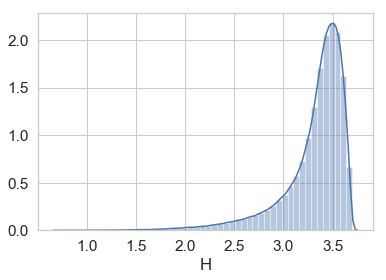

In [160]:
pseudo_count=second_smallest(values)
mean_exp = mean_exp+pseudo_count
def entropy(x):
    result = [i*np.log2(i) for i in x]
    return -sum(result)
group_df = mean_exp/mean_exp.sum()
group_df = group_df.T
group_df['H'] = group_df.apply(entropy,axis=1)
sns.distplot(group_df['H'])
print (group_df['H'].min())

In [161]:
def ecdf(x=None, data=None, ax=None, step=True, palette=None, **kwargs):
    """ Empirical Cumulative  Distribution Function
    
    Arguments
    -----------
    x : str or array-like, optional
        Inputs for plotting long-form data.
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If `x` and `y` are absent, this is interpreted as wide-form.
        Otherwise, data is expected to be long-form.
    ax : matplotlib.axes, optional
        Axes object to draw the plot onto, otherwise uses the current axes.
    step : bool, optional
        Whether or not to plot ECDF as horizontal steps
    palette : palette name, list, or dict, optional
        Colors to use for the different levels of the `hue` variable. Should be somthing that
        can be interpreted by `color_palette()` or a dictionary mapping hue levels to
        matplotlib colors.
    **kwargs : Other keyword arguments are passed through to `plt.step` or `plt.scatter` at draw time
    
    """
    
    # if no axes object create one
    if ax is None:
        fig, ax = plt.subplots()
    
    # set palette if passed
    if palette is not None:
        sns.set_palette(palette)
        
    # safety check on data
    if x is None and data is None:
        raise ValueError('No data passed')
    
    if isinstance(x, str) and data is None:
        raise ValueError('Unable to understand how to interpret data')
        
    if isinstance(x, str) and data is not None:
        xlabel = x
        x = data[x]
    elif isinstance(x, pd.Series):
        xlabel = x.name
    elif isinstance(x, np.ndarray):
        xlabel = 'X'
    ylabel = 'ECDF'
    
    # sort values and get cumulative sum
    x_val, cdf = np.sort(x), np.arange(1, len(x) + 1) / len(x)
    if step:
        ax.step(x_val, cdf, **kwargs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        ax.scatter(x_val, cdf, **kwargs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    return ax

In [176]:
group_df['H'].max()

3.6979128041883005

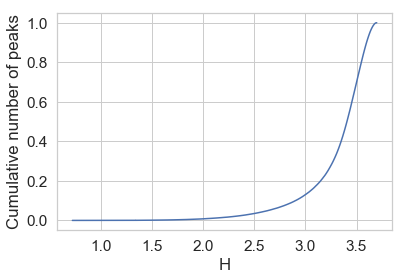

In [162]:
sns.set_style("whitegrid")
ecdf(group_df['H'])
plt.ylabel("Cumulative number of peaks")
plt.savefig("fig3a.png")

In [164]:
group_df = group_df.sort_values("H")

In [165]:
group_df.head()

group,Bcell,CD4Tcell,CD8Tcell,CLP,CMP,Ery,GMP,HSC,LMPP,MEP,MPP,Mono,NKcell,H
Geneid,,,,,,,,,,,,,,
region_71952,0.015218,0.003564,0.004541,0.014922,0.002265,0.911047,0.005631,0.001955,0.001433,0.017083,0.003828,0.010347,0.008167,0.718200
region_269058,0.011205,0.005996,0.003234,0.019697,0.000926,0.891992,0.013501,0.000277,0.000277,0.020746,0.002435,0.020172,0.009543,0.816805
region_269339,0.017819,0.004350,0.005426,0.006728,0.003229,0.894701,0.010467,0.003131,0.003762,0.024537,0.001951,0.009061,0.014838,0.823012
region_14213,0.013517,0.003297,0.005939,0.889624,0.004474,0.009583,0.044427,0.002337,0.003143,0.008207,0.003514,0.005782,0.006155,0.824161
region_280356,0.012876,0.004583,0.004304,0.878107,0.001992,0.010841,0.062307,0.003180,0.004134,0.003019,0.001839,0.008848,0.003971,0.846221


In [166]:
group_df.tail()

group,Bcell,CD4Tcell,CD8Tcell,CLP,CMP,Ery,GMP,HSC,LMPP,MEP,MPP,Mono,NKcell,H
Geneid,,,,,,,,,,,,,,
region_155309,0.078821,0.082305,0.084800,0.073084,0.080859,0.082081,0.074945,0.069757,0.071927,0.079911,0.068255,0.074398,0.078858,3.697366
region_198104,0.076891,0.075145,0.089950,0.073092,0.072140,0.079722,0.073832,0.081929,0.078385,0.075769,0.069412,0.079943,0.073790,3.697391
region_106648,0.078392,0.078814,0.086130,0.069213,0.081641,0.076225,0.081610,0.070293,0.074859,0.082537,0.074138,0.074621,0.071527,3.697476
region_300267,0.071220,0.085407,0.080781,0.081728,0.075664,0.078594,0.080489,0.076341,0.077637,0.068950,0.079980,0.070389,0.072820,3.697682
region_16750,0.069941,0.084723,0.081881,0.075545,0.076018,0.080460,0.078399,0.074634,0.073507,0.084145,0.076042,0.070432,0.074271,3.697913


(47189, 77)


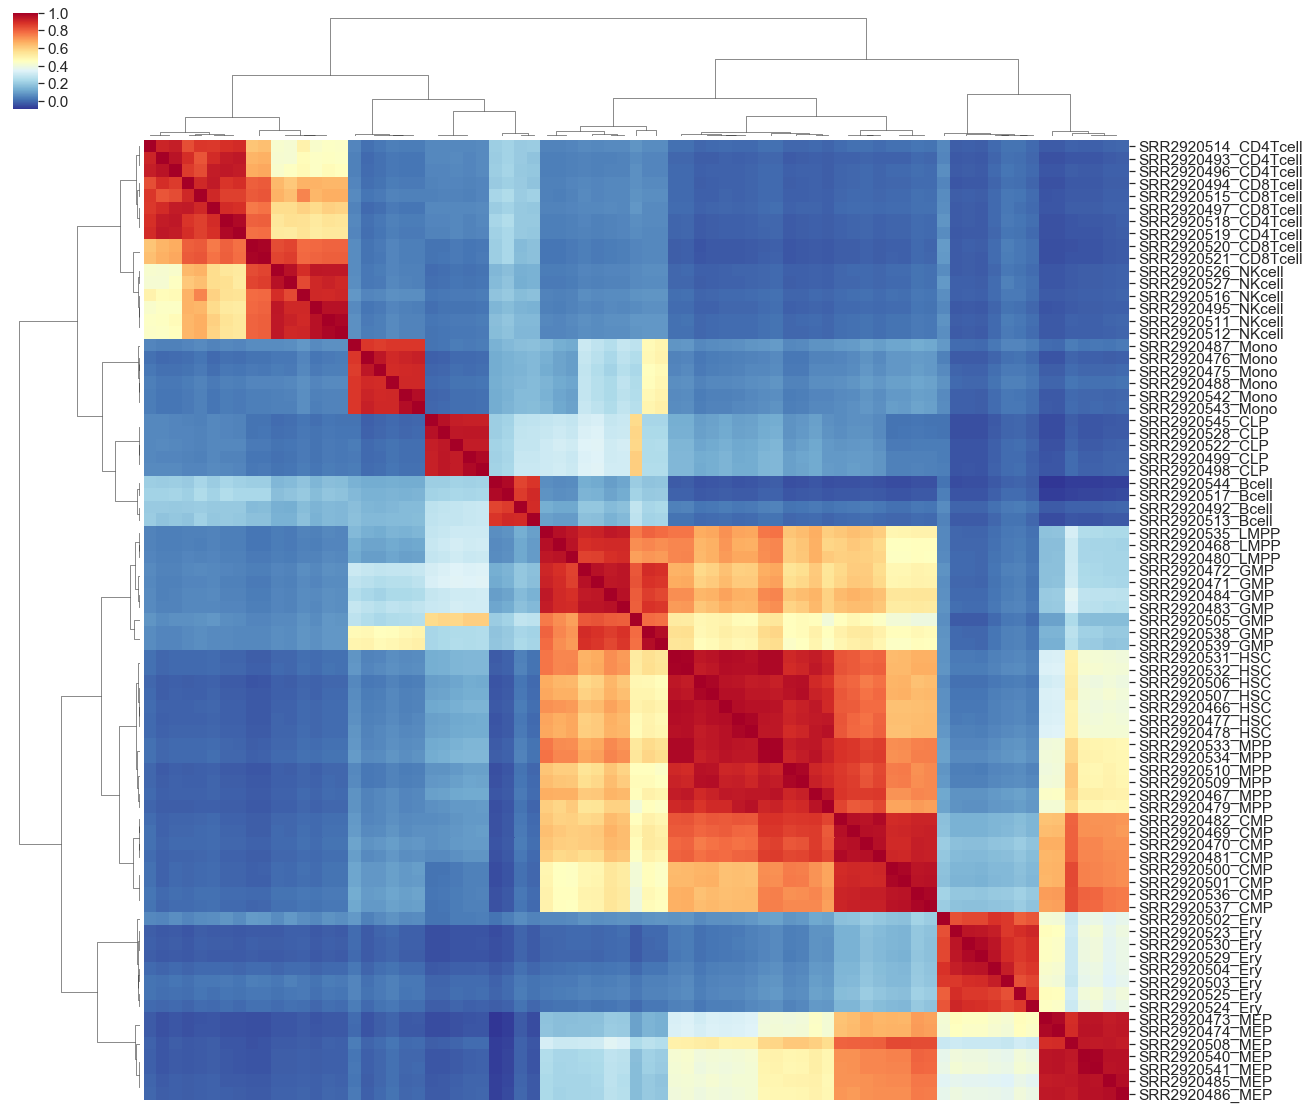

In [181]:
rename_df = df.T
# rename_df = rename_df.drop(['group'])
rename_df = rename_df.loc[group_df[group_df['H']<=3].index.tolist()]
print (rename_df.shape)
rename_df.columns = [x.split("_")[0]+"_"+x.split("_")[-1].replace(".rmdup.bam","") for x in rename_df.columns]
for c in rename_df.columns:
    rename_df[c] = rename_df[c].astype(float)
df_cor = pd.DataFrame(rename_df.corr())
sns.set(font_scale=1.4)
sns.clustermap(df_cor,cmap="RdYlBu_r",figsize=(20,20),method="ward",yticklabels=True,xticklabels=False)
plt.savefig("fig3b.png", bbox_inches='tight')

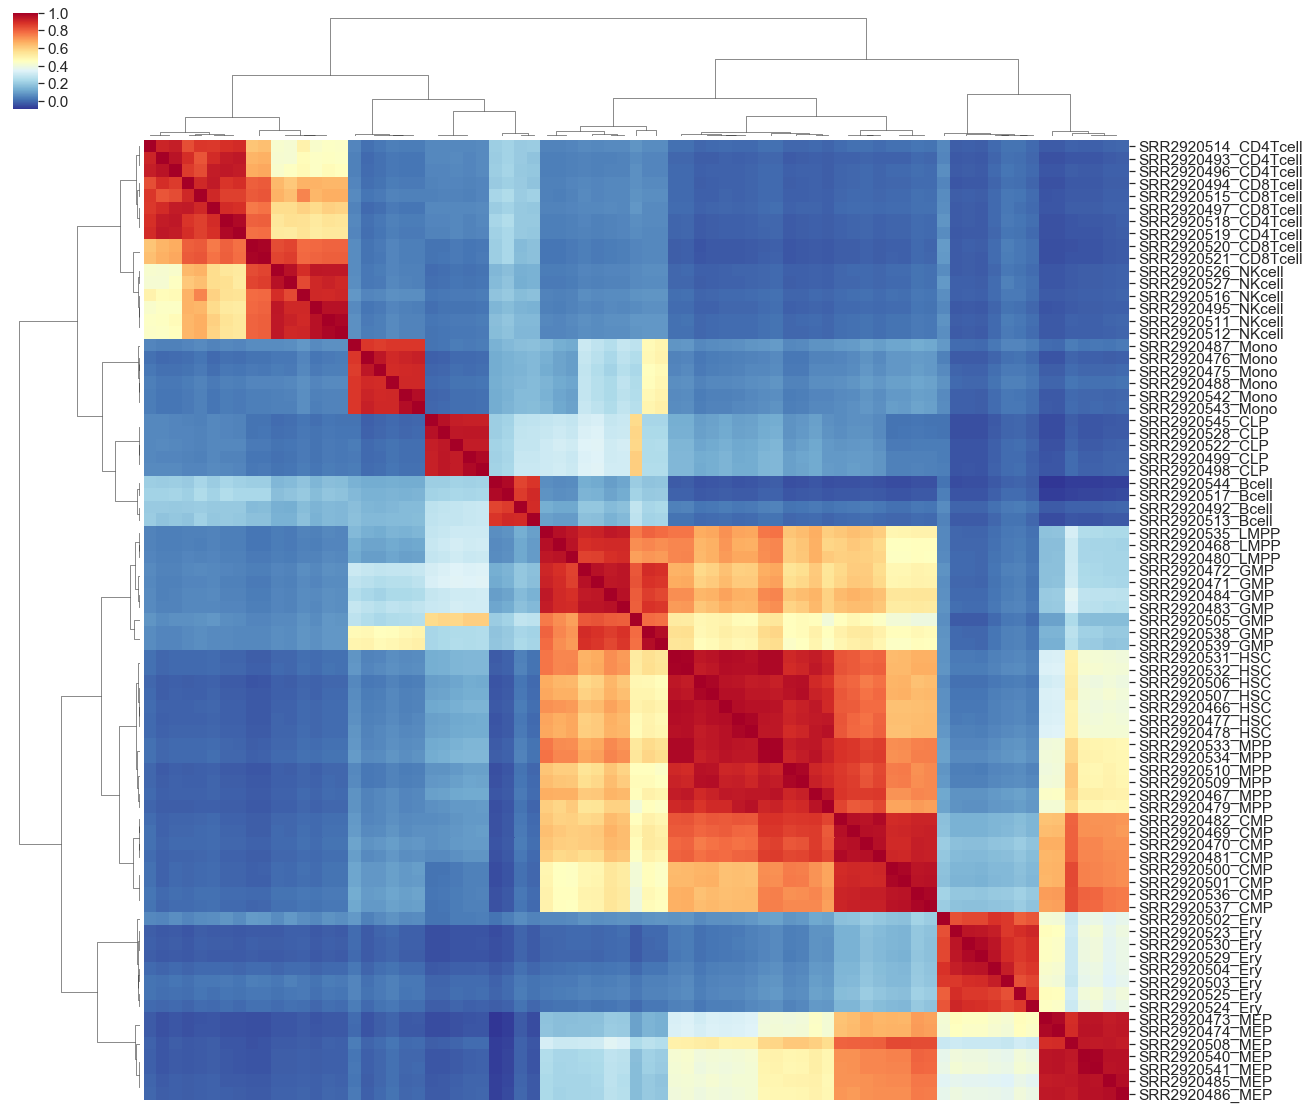

In [219]:
sns.set(font_scale=1.4)
sns.clustermap(df_cor,cmap="RdYlBu_r",figsize=(20,20),method="ward",yticklabels=True,xticklabels=False)
plt.savefig("fig3b.png", bbox_inches='tight')

In [182]:
from sklearn.decomposition import PCA

In [185]:
rename_df.head()

,SRR2920502_Ery,SRR2920484_GMP,SRR2920531_HSC,SRR2920525_Ery,SRR2920518_CD4Tcell,SRR2920510_MPP,SRR2920519_CD4Tcell,SRR2920495_NKcell,SRR2920504_Ery,SRR2920472_GMP,...,SRR2920487_Mono,SRR2920512_NKcell,SRR2920535_LMPP,SRR2920543_Mono,SRR2920541_MEP,SRR2920486_MEP,SRR2920529_Ery,SRR2920469_CMP,SRR2920479_MPP,SRR2920523_Ery
Geneid,,,,,,,,,,,,,,,,,,,,,
region_71952,29.606821,0.746284,0.083472,60.277221,0.164812,0.819101,0.642817,0.559635,55.297869,0.000000,...,0.663017,0.658534,0.000000,2.178472,2.421264,2.276836,163.420683,0.000000,0.251011,165.657229
region_269058,20.354690,0.000000,0.000000,3.598640,0.329623,0.000000,0.428545,0.373090,39.663916,0.000000,...,0.663017,0.219511,0.000000,0.000000,0.440230,0.650525,69.961142,0.000000,0.000000,22.367221
region_269339,26.368575,0.000000,0.000000,16.193880,0.164812,0.000000,0.214272,0.186545,47.480893,0.531555,...,0.663017,0.658534,0.089196,0.000000,0.550287,0.650525,51.269234,0.274690,0.251011,41.938539
region_14213,4.163459,3.233898,0.250417,2.698980,0.000000,0.819101,0.642817,0.559635,1.447588,3.455110,...,0.663017,0.658534,0.713572,2.178472,0.660345,2.602098,0.000000,1.373451,0.000000,1.397951
region_280356,1.387820,1.243807,0.166944,0.000000,0.494435,0.000000,0.214272,0.000000,0.579035,2.657777,...,0.000000,0.219511,0.000000,1.210262,0.000000,0.325262,0.534055,0.000000,0.000000,0.698976


             x           y    symbol
0   124.038871  580.524081       Ery
1  -165.548599 -263.010859       GMP
2  -736.957558 -522.828433       HSC
3    81.047773  703.271566       Ery
4  1005.738837 -161.787951  CD4Tcell


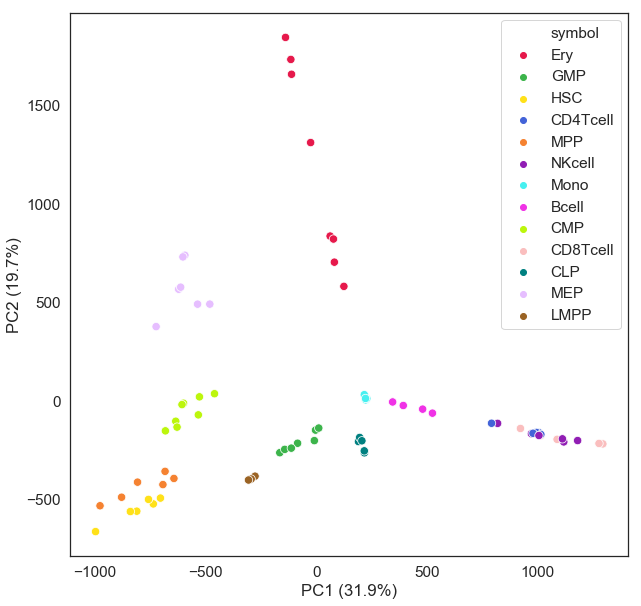

In [204]:
def plot_PCA(df):
    plt.figure(figsize=(10,10))
    color_set = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    pca = PCA(n_components=2)
    transform_df_all = pd.DataFrame(pca.fit_transform(df))
    transform_df = transform_df_all[[0,1]]
    transform_df.columns=['x','y']
    transform_df['symbol'] = [x.split("_")[-1] for x in df.index.tolist()]
    color_map={}
    count = 0
    for x in transform_df['symbol'].unique():
        color_map[x] = color_set[count]
        count+=1
    print (transform_df.head())
    xlabel="PC1 ({0:.1%})".format(pca.explained_variance_ratio_[0])
    ylabel="PC2 ({0:.1%})".format(pca.explained_variance_ratio_[1])
    sns.scatterplot(data=transform_df,x="x",y="y",hue="symbol",palette=color_map,s=70)
    
    sns.set_style("white")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plot_PCA(rename_df.T)
plt.savefig("fig3c.pdf", bbox_inches='tight')

             x           y    symbol
0   124.038871  580.524081       Ery
1  -165.548599 -263.010859       GMP
2  -736.957558 -522.828433       HSC
3    81.047773  703.271566       Ery
4  1005.738837 -161.787951  CD4Tcell


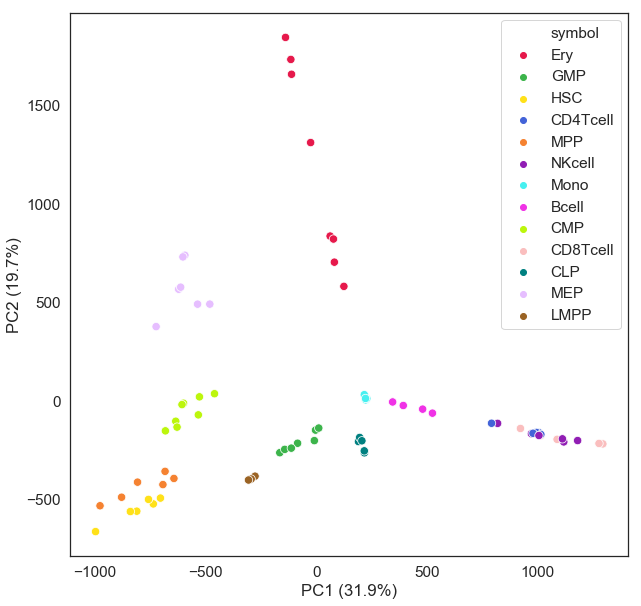

In [221]:
sns.set_style("white")
plot_PCA(rename_df.T)
plt.savefig("fig3c.png", bbox_inches='tight')

In [ ]:
# get Ery specific peaks

In [205]:
df = pd.read_csv(glob.glob("*.bed")[0],sep="\t",index_col=0)

In [207]:
tmp = group_df.drop(['H'],axis=1)
group_df['max_expressed_tissue'] = tmp.idxmax(axis=1)


In [209]:
group_df.to_csv("tissue_specific_result.csv")

In [210]:
ery_list = group_df[(group_df['H']<=3)&(group_df['max_expressed_tissue']=="Ery")].index.tolist()

In [211]:
len(ery_list)

4518

In [212]:
df = df.loc[ery_list]

In [216]:
df.head()

,Chr,Start,End,Strand,Length,SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam,SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam,SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920582_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,...,SRR2920558_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920486_megakaryocyte_erythroid_progenitor_cell_MEP.rmdup.bam,SRR2920571_acute_myeloid_leukemia__preminusleukemic_hematopoietic_stem_cell_pHSC.rmdup.bam,SRR2920561_acute_myeloid_leukemia__preminusleukemic_hematopoietic_stem_cell_pHSC.rmdup.bam,SRR2920529_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam,SRR2920469_common_myeloid_progenitor_cell_CMP.rmdup.bam,SRR2920567_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920569_acute_myeloid_leukemia__blast_cell_Blast.rmdup.bam,SRR2920479_multipotent_progenitor_cell_MPP.rmdup.bam,SRR2920523_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
region_71952,chr12,51295424,51296069,+,646,64,3,1,67,3,...,3,7,0,10,306,0,1,1,1,237
region_269058,chr5,175526196,175526709,+,514,44,0,0,4,0,...,3,2,3,5,131,0,0,0,0,32
region_269339,chr5,177165385,177165952,+,568,57,0,0,18,0,...,5,2,3,9,96,1,0,0,1,60
region_103559,chr14,103826853,103827314,+,462,41,1,0,18,2,...,3,7,1,3,101,0,6,2,0,66
region_109223,chr15,62747680,62748190,+,511,33,0,0,17,2,...,2,4,0,4,113,0,5,0,0,67


In [217]:
df[['Chr','Start','End']].to_csv("Ery_specific.bed",sep="\t",header=False,index=False)

In [214]:
group_df.shape

(361106, 15)

In [215]:
np.log2(13)

3.700439718141092

In [ ]:
# definition H<=3 tissue specific; H>=3.5 universal open regions

In [218]:
df = pd.read_csv(glob.glob("*.bed")[0],sep="\t",index_col=0)
uni_list = group_df[group_df['H']>=3.5].index.tolist()
df = df.loc[uni_list]
df[['Chr','Start','End']].to_csv("Universal_open.bed",sep="\t",header=False,index=False)

0.2914701530259107

In [77]:
rename_df.columns

Index(['SRR2920502_Ery', 'SRR2920484_GMP', 'SRR2920531_HSC', 'SRR2920525_Ery',
       'SRR2920518_CD4Tcell', 'SRR2920510_MPP', 'SRR2920519_CD4Tcell',
       'SRR2920495_NKcell', 'SRR2920504_Ery', 'SRR2920472_GMP',
       'SRR2920476_Mono', 'SRR2920488_Mono', 'SRR2920492_Bcell',
       'SRR2920477_HSC', 'SRR2920500_CMP', 'SRR2920497_CD8Tcell',
       'SRR2920490_Marrow', 'SRR2920483_GMP', 'SRR2920471_GMP',
       'SRR2920470_CMP', 'SRR2920494_CD8Tcell', 'SRR2920545_CLP',
       'SRR2920499_CLP', 'SRR2920516_NKcell', 'SRR2920542_Mono',
       'SRR2920528_CLP', 'SRR2920475_Mono', 'SRR2920506_HSC', 'SRR2920538_GMP',
       'SRR2920526_NKcell', 'SRR2920508_MEP', 'SRR2920473_MEP',
       'SRR2920530_Ery', 'SRR2920514_CD4Tcell', 'SRR2920533_MPP',
       'SRR2920498_CLP', 'SRR2920544_Bcell', 'SRR2920467_MPP',
       'SRR2920478_HSC', 'SRR2920482_CMP', 'SRR2920511_NKcell',
       'SRR2920539_GMP', 'SRR2920509_MPP', 'SRR2920513_Bcell',
       'SRR2920517_Bcell', 'SRR2920520_CD8Tcell', 'SRR292050

In [68]:
df.T.columns.tolist()

['SRR2920502_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920484_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920531_hematopoietic_stem_cell_HSC.rmdup.bam',
 'SRR2920525_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920518_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920510_multipotent_progenitor_cell_MPP.rmdup.bam',
 'SRR2920519_CD4plus_T_cell_CD4Tcell.rmdup.bam',
 'SRR2920495_CD56plus_natural_killer_cell_NKcell.rmdup.bam',
 'SRR2920504_CD71plusGPAplus_erythroblast_cell_Ery.rmdup.bam',
 'SRR2920472_granulocyte_macrophage_progenitor_cell_GMP.rmdup.bam',
 'SRR2920476_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920488_CD14plus_monocyte_cell_Mono.rmdup.bam',
 'SRR2920492_CD19plusCD20plus_B_cell_Bcell.rmdup.bam',
 'SRR2920477_hematopoietic_stem_cell_HSC.rmdup.bam',
 'SRR2920500_common_myeloid_progenitor_cell_CMP.rmdup.bam',
 'SRR2920497_CD8plus_T_cell_CD8Tcell.rmdup.bam',
 'SRR2920490_CD34plus_bone_marrow_CD34_Bone_Marrow.rmdup.bam',
 'SRR2920483_granulo

In [69]:
a=[1,2,3,4]

In [71]:
a[[1,2]]

TypeError: list indices must be integers or slices, not list

In [51]:
sns.clustermap(df.T.corr())

(80, 361107)

Geneid
region_1    1.0
region_2    1.0
region_3    1.0
region_4    1.0
region_5    1.0
dtype: float64